In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from google.colab import drive
from contextlib import suppress
from sklearn import tree

In [2]:
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/MachineLearning/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MachineLearning/Titanic/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
with suppress(Exception): train.drop(columns=['Cabin','Name', 'Ticket'], inplace=True)
with suppress(Exception): test.drop(columns=['Cabin','Name', 'Ticket'], inplace=True)
train_labels = train['Survived']
with suppress(Exception): train.drop(columns=['Survived'], inplace=True)

train['Age'].fillna(value = train['Age'].mean(), inplace = True)
train['Sex'] = train['Sex'].apply({'male': 1,'female': 0}.get)
test['Sex'] = test['Sex'].apply({'male': 1,'female': 0}.get)
train['Embarked'].fillna(value = train['Embarked'].mode().values[0], inplace = True)
train['Embarked'] = train['Embarked'].map({ 'S': 0, 'C': 1, 'Q': 2 })
test['Embarked'] = test['Embarked'].map({ 'S': 0, 'C': 1, 'Q': 2 })

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


[Text(0.4230769230769231, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(0.15384615384615385, 0.625, 'x[5] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 23.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 130.0\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 26.85\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8461538461538461, 0.375, 'x[3] <= 43.0\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.7692307692307693, 0.125, 'gini = 0.091

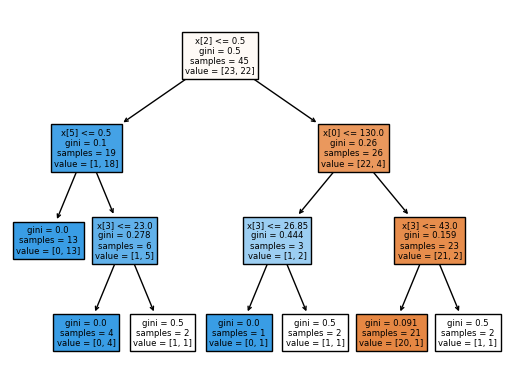

In [15]:
(train, val, train_labels, val_labels) = train_test_split(train, train_labels,
test_size=0.3, random_state=84)

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(train, train_labels)

y = decision_tree.predict(val)
accuracy_score(val_labels, y)
tree.plot_tree(decision_tree, filled=True)